In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score


In [7]:

# Load dataset
df = pd.read_csv("twitter_training.csv", header=None, names=["id", "category", "sentiment", "text"])
df

,id,category,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [8]:

# Assuming df is already loaded
# Column 2 in your dataset is the sentiment label
sentiment_counts = df.iloc[:, 2].value_counts()

print("Number of tweets for each sentiment:")
print(sentiment_counts)


Number of tweets for each sentiment:
sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


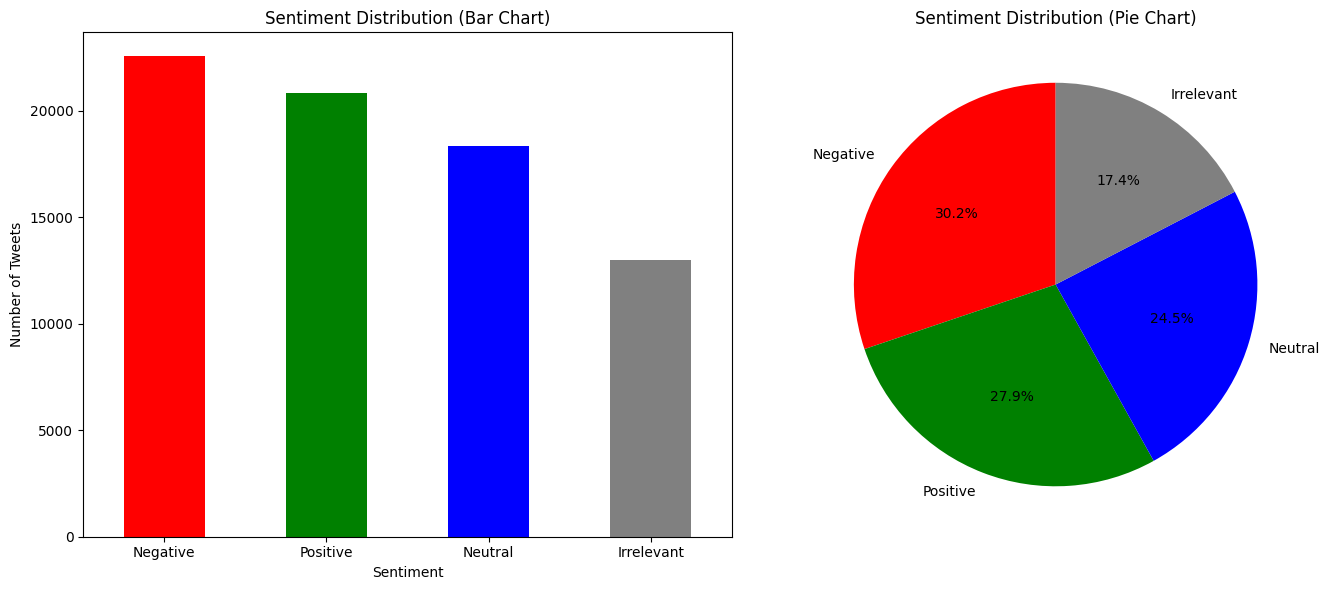

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Count how many tweets per sentiment
sentiment_counts = df.iloc[:, 2].value_counts()

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart
sentiment_counts.plot(kind='bar', ax=axes[0], color=['red','green','blue','gray'])
axes[0].set_title("Sentiment Distribution (Bar Chart)")
axes[0].set_xlabel("Sentiment")
axes[0].set_ylabel("Number of Tweets")
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
sentiment_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    ax=axes[1],
    startangle=90,
    colors=['red','green','blue','gray']
)
axes[1].set_ylabel("")  # remove y label
axes[1].set_title("Sentiment Distribution (Pie Chart)")

plt.tight_layout()
plt.show()


In [4]:

# Drop missing values
df = df.dropna(subset=["text", "sentiment"])
df

,id,category,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [8]:

# Features and labels
X = df["text"].astype(str)     # Convert to string to avoid float errors
y = df["sentiment"]
X = X.values
y = y.values
print("Feature shape:", X.shape)
print("Label shape:", y.shape)

Feature shape: (73996,)
Label shape: (73996,)


In [9]:

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:

# Build pipeline: TF-IDF + SVM
model = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, stop_words="english")),
    ("svm", SVC(kernel="linear", probability=True))   # linear kernel for text
])

In [11]:

# Train model
print("Training model...")
model.fit(X_train, y_train)


Training model...


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('svm', SVC(kernel='linear', probability=True))])

In [12]:

# Evaluate
y_pred = model.predict(X_test)
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.721418918918919

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.70      0.59      0.64      2575
    Negative       0.76      0.80      0.78      4472
     Neutral       0.74      0.65      0.69      3622
    Positive       0.68      0.78      0.72      4131

    accuracy                           0.72     14800
   macro avg       0.72      0.71      0.71     14800
weighted avg       0.72      0.72      0.72     14800



In [ ]:

# --- User input prediction ---
while True:
    user_input = input("Enter a tweet (or type 'exit' to quit): ")
    if user_input.lower() == "exit":
        break
    prediction = model.predict([user_input])[0]
    print(user_input)
    print(f"Predicted Sentiment: {prediction}\n")
    


you are bad 
Predicted Sentiment: Negative

you are good 
Predicted Sentiment: Positive

yu are stupid 
Predicted Sentiment: Negative

who are you 
Predicted Sentiment: Positive

oho good my phone is broke 
Predicted Sentiment: Irrelevant

whao you are the topper of the class
Predicted Sentiment: Positive

sachin is oversmart
Predicted Sentiment: Positive

